# Importing Libraries

In [2]:
# importing the librariers needed to execute the process

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from numpy import inf

import time

import pandas as pd



# Save the distribution images in below mentioned folder

In [3]:
import os
desired_folder = 'C:\\Users\\H370546\\Downloads\\Images-task2\\'

# Main Functioning of the game
 
 The aim of the game is to reach the shortest path in a N * N matrix starting from 0. 
 there are two game modes to the executing the program to find the shortest path 
 
 
 Assumption - Game starts from 1,1 and destination is n,n 
 
 Game Mode 1 : The time spent on a cell is the number on x, y cell
 
 
 Game Mode 2: The time spent on a cell is the absolute of the difference between the previous cell the  agent was on and the   current cell it is on 

In [4]:
class Mazeandpathvisualisation:
    
    def showmaze(self, weightmatrix):
        #self.numberofRows = numberofRows
        
        #data = np.random.seed(numberofRows)
        #data = np.random.randint(numberofRows, size = (numberofRows,numberofRows))
        #Keep the numbers constant

        print("visualizing the maze with time associated with each cell")
        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(weightmatrix, cmap=mpl.colors.ListedColormap(['white','grey',"silver"]))

        for (i, j), z in np.ndenumerate(weightmatrix):
            ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

        plt.show()
        return
   

    def visualizepath(self, path):
        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(path, cmap=mpl.colors.ListedColormap(['white','grey']))

        for (i, j), z in np.ndenumerate(path):
            ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
        
        name=str("Maze")+"_"+str(path.shape[0])
        full_path = os.path.join(desired_folder, name)
        plt.savefig(name)
        plt.show()


#  Heuristic Algorithm

 In this Algorithm, the path calculated by the algorithm in game mode 1 is to find the smaller value between cells (x +1, y) and (x, y+1). And in Game Mode2 it is the absolute difference between abs (x+1, y) – (x, y+1). The same has been illustrated in “class Heuristic” in the code. The chosen path is marked as “1” and the rest of the cells are marked as “0”.

In [5]:
# Below logic is for Heuristic Algorithm


class Heuristic:
    def heuristicpath(self,data,numberofRows,modeofGame):
        ti = time.time()
        

        path = np.zeros((numberofRows,numberofRows), dtype = np.int8)#creating a matrix of zero
        x,y = (0,0)

        cost = 0
        # we cover 2n-1 cell
        if modeofGame == 1:#mode 1  of the game
            for i in range((2 * numberofRows) - 1):
                path[x][y] = 1
                cost = cost + data[x][y]
                if x < numberofRows - 1  and y < numberofRows - 1 :  # calculating the shortest path between adjacent cells
                    if abs(data[x + 1][y]) <= abs(data[x][y + 1]):
                        x = x + 1
                    else :
                        y = y + 1
                elif x == numberofRows - 1 and y != numberofRows - 1 :
                        y = y + 1

                elif y == numberofRows - 1 and x != numberofRows -1 :
                        x = x + 1
        else:
            for i in range(2 * numberofRows -1 ):
                path[x][y] = 1
                xpre = x
                ypre = y
                # calculating the absolute shortest path between adjacent cells
                if x < numberofRows - 1  and y < numberofRows - 1 :
                    if abs(data[x + 1][y]  - data[x][y]) <= abs(data[x][y + 1] - data[x][y]):
                        x = x + 1
                    else :
                        y = y + 1
                elif x == numberofRows - 1 and y != numberofRows - 1:
                        y = y + 1

                elif y == numberofRows- 1 and x != numberofRows - 1 :
                        x = x + 1
                cost = cost + abs(data[xpre][ypre] - data[x][y])

                    
        tf = time.time()
        return path,cost,round(1000*(tf-ti),2)
        
    

In [6]:
# Below logic is for Dijikstra Algorithm for both the game modes mentioned above

class Dijikstra: 
    
    def dijkstrapath(self , matrixcomponent, numberofRows,modeofGame):
            ti = time.time()
            graph = {}
            matrix = matrixcomponent
            costs = {}
            if modeofGame == 1:
                for x in range(numberofRows):
                    for y in range(numberofRows):
                            xm1 = x - 1
                            ym1 = y - 1
                            xp1 = x + 1
                            yp1 = y + 1
                            costs[str(x) + str(y)] = inf
                            graph[str(x) + str(y)] = {}
                            above = np.array((xm1, y)) if xm1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(above[0]) == False:
                                graph[str(x) + str(y)][str(xm1) + str(y)] = matrix[xm1][y]
                            below = np.array((xp1, y)) if xp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(below[0]) == False:
                                graph[str(x) + str(y)][str(xp1) + str(y)] = matrix[xp1][y]
                            left = np.array((x, ym1)) if ym1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(left[0]) == False :
                                graph[str(x) + str(y)][str(x) + str(ym1)] = matrix[x][ym1]
                            right = np.array((x, yp1)) if yp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(right[0]) == False:
                                graph[str(x) + str(y)][str(x) + str(yp1)] = matrix[x][yp1]
            else:
                for x in range(numberofRows):
                    for y in range(numberofRows):
                            xm1 = x - 1
                            ym1 = y - 1
                            xp1 = x + 1
                            yp1 = y + 1
                            costs[str(x) + str(y)] = inf
                            graph[str(x) + str(y)] = {}
                            above = np.array((xm1, y)) if xm1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(above[0]) == False:
                                graph[str(x) + str(y)][str(xm1) + str(y)] = abs(matrix[xm1][y] - matrix[x][y])
                            below = np.array((xp1, y)) if xp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(below[0]) == False:
                                graph[str(x) + str(y)][str(xp1) + str(y)] = abs(matrix[xp1][y]  - matrix[x][y])
                            left = np.array((x, ym1)) if ym1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(left[0]) == False :
                                graph[str(x) + str(y)][str(x) + str(ym1)] = abs(matrix[x][ym1] - matrix[x][y])
                            right = np.array((x, yp1)) if yp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(right[0]) == False:
                                graph[str(x) + str(y)][str(x) + str(yp1)] =abs(matrix[x][yp1] - matrix[x][y])


            costs["00"] = matrix[0][0]
            #print(graph)
            destination = str(numberofRows - 1) + str(numberofRows - 1)
            parents = {}
            result = {}
            result = self.search('00',destination , graph, costs, parents)
            

            
            #print('parent dictionary={}'.format(result))
            spath =self.backpedal('00', destination, result)
            #print('Shortest path={}'.format(self.backpedal('00',destination, result)))   
            path = np.zeros((numberofRows,numberofRows), dtype = np.int8)
            for choosen in spath:
                    path[int(choosen[0])][int(choosen[1])] = 1
            cost = 0
            if modeofGame == 1:
                for choosen in spath:
                    cost = cost + matrix[int(choosen[0])][int(choosen[1])]
            else:
                for i in range(len(spath) - 1):
                    cost=cost+abs(matrix[int(spath[i][0])][int(spath[i][1])]-matrix[int(spath[i+1][0])][int(spath[i+1][1])])
                
           
            tf = time.time()
            return path,cost,round(1000*(tf-ti),2)


            
# Forward propogation logic to find the shortest path

    def search(self,source, target, graph, costs, parents):

        nextNode = source
        #print(source)

        while nextNode != target:

            for neighbor in graph[nextNode]:

                if graph[nextNode][neighbor] + costs[nextNode] < costs[neighbor]:

                    costs[neighbor] = graph[nextNode][neighbor] + costs[nextNode]

                    parents[neighbor] = nextNode

                del graph[neighbor][nextNode]

            del costs[nextNode]

            nextNode = min(costs, key=costs.get)
        
        return parents

# Back Pedal logic to backtrack the path
   
    def backpedal(self,source, target, searchResult):

        node = target

        backpath = [target]

        path = []

        while node != source:

            backpath.append(searchResult[node])

            node = searchResult[node]

        for i in range(len(backpath)):

            path.append(backpath[-i - 1])

        return path


Enter the size of the Matrix 10
visualizing the maze with time associated with each cell


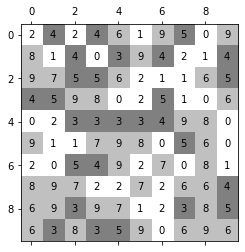

Choose the Algorithm mode , Enter 1 for Heuristic Algorithm or 2 for dijikstra's to select1
Choose the game mode , Enter 1 or 2 to select1


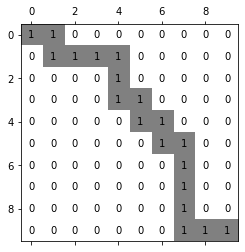

In [6]:
# drawing a matrix to show the shortest path and the graphs for the model

OBJ = Mazeandpathvisualisation()
sizeofmaze = int(input("Enter the size of the Matrix "))
weightmatrix = np.random.randint(sizeofmaze, size = (sizeofmaze,sizeofmaze))

OBJ.showmaze(weightmatrix)


selectOfAlgorithm = int(input("Choose the Algorithm mode , Enter 1 for Heuristic Algorithm or 2 for dijikstra's to select"))
modeofGame = int(input("Choose the game mode , Enter 1 or 2 to select"))
#cost = 0
#path = np.zeros((numberofRows,numberofRows), dtype = np.int8)
#call the heuristic algorithm based on the selection
if selectOfAlgorithm == 1:                   
        hr = Heuristic()
        result = hr.heuristicpath(weightmatrix , sizeofmaze,modeofGame)
        path , cost, tm = result
        
else:
        dj =Dijikstra()
        result = dj.dijkstrapath(weightmatrix,sizeofmaze,modeofGame)
        path, cost, tm = result
OBJ.visualizepath(path)

                  




## Heuristic algorithm can cover more number of cell than Dijkstra to reach destination

visualizing the maze with time associated with each cell


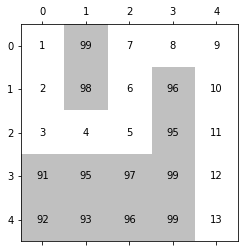

Path choosed by Heuristic Algorithm


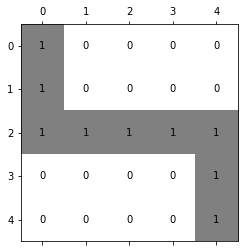

Path choosed by Dijkstra's Algorithm


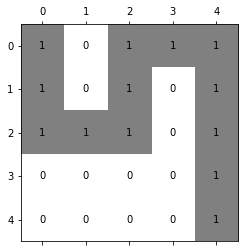

In [7]:
weightmatrix = np.array([     [1,99,7,8,9],
                              [2,98,6,96,10],
                              [3,4,5,95,11],
                              [91,95,97,99,12],
                              [92,93,96,99,13]])

OBJ.showmaze(weightmatrix)
hr = Heuristic()
result = hr.heuristicpath(weightmatrix , 5,1)
path , cost, tm = result
print("Path choosed by Heuristic Algorithm")
OBJ.visualizepath(path)
dj =Dijikstra()
result = dj.dijkstrapath(weightmatrix,5,1)
path, cost, tm = result
print("Path choosed by Dijkstra's Algorithm")
OBJ.visualizepath(path)

In [9]:
def analysis(distribution,para1,para2):
    heuristic = Heuristic()
    dijkstra = Dijikstra()
    timeheuristic = [[],[]]
    timedijkstra = [[],[]]
    costheuristic = [[],[]]
    costdijkstra = [[],[]]
    std = [[],[]]
    var = [[],[]]
    size = 7
    table = {}
    
    for mode in range(2):
        rs = 0
        for i in para1:
            costsH = []
            costsD = []
            timeH = []
            timeD = []
            for j in para2:
                rs += 1
                np.random.seed(rs)
                if distribution == "size of maze":
                    weightmatrix = np.random.randint(20, size = (i,i))
                    xlb = "Size of maze"
                    labl = "For game mode: "
                    _,csH,timedH = heuristic.heuristicpath(weightmatrix, i,mode + 1)
                    costsH.append(csH)
                    timeH.append(timedH)
                    _,csD,timedD = dijkstra.dijkstrapath(weightmatrix, i,mode + 1)
                    costsD.append(csD)
                    timeD.append(timedD)
                    
                if distribution == "uniform":
                   # print(weightmatrix.shape)
                    weightmatrix = np.random.uniform(low=0.0, high=i, size = (size,size) )
                    xlb = "Range 0 - X"
                    labl = "For game mode: "
                    
                if distribution == "poisson":
                    weightmatrix = np.random.poisson(lam = i, size=(size,size))
                    xlb = "Lambda"
                    labl = "For game mode: "
                if distribution == "negative binomial":
                    weightmatrix = np.random.negative_binomial(i, j, size=(size,size))
                    xlb = "Probablity of success"
                    labl = "For trial: "
                if distribution == "gamma":
                    weightmatrix = np.random.gamma(shape = i, scale=j, size=(size,size))
                    xlb = "Scale"
                    labl = "For shape: "
                if distribution == "log normal":
                    weightmatrix = np.random.lognormal(mean=i, sigma=j, size=(size,size))
                    xlb = 'Sigma(Standard deviation)'
                    labl = "For mean: "
                if distribution != "size of maze":
                    _,csH,timedH = heuristic.heuristicpath(weightmatrix, size,mode + 1)
                    costsH.append(csH)
                    _,csD,timedD = dijkstra.dijkstrapath(weightmatrix, size,mode + 1)
                    costsD.append(csD)
            costheuristic[mode].append(np.mean(costsH))
            costdijkstra[mode].append(np.mean(costsD))
            std[mode].append(np.std(costsH))
            var[mode].append(np.var(costsD))
            timeheuristic[mode].append(np.mean(timeH))
            timedijkstra[mode].append(np.mean(timeD))
            if distribution in ["negative binomial" , "gamma" , "log normal"]:
                print(labl, i)
                plt.figure(figsize=(6,6))
                plt.plot(para2,costsH, label = "heuristic")
                plt.plot(para2,costsD, label = "dijkstra")
                plt.ylabel('Cost')
                plt.xlabel(xlb)
                plt.legend()
                plt.show() 
        if distribution in ["size of maze" , "uniform" , "poisson"]:
            print("For game mode:" , mode + 1)
            plt.figure(figsize=(6,6))
            plt.plot(para1,costheuristic[mode], label = "heuristic")
            plt.plot(para1,costdijkstra[mode], label = "dijkstra")
            plt.xticks(para1)
            plt.ylabel('Cost')
            plt.xlabel(xlb)
            plt.legend()
            plt.show()   
    table = pd.DataFrame(table)
    table["AvgCost1Heuristic"] = costheuristic[0]
    table["AvgCost1Dijkstra"] = costdijkstra[0]
    table["AvgCost2Heuristic"] = costheuristic[1]
    table["AvgCost2Dijkstra"] = costdijkstra[1]
    table["Std1"] = std[0]
    table["Std2"] = std[1]
    table["Var1"] = var[0]
    table["Var2"] = var[1]
    if distribution == "size of maze":
        table['AvgtimeH1'] = timeheuristic[0]
        table['AvgtimeH2'] = timeheuristic[1]
        table['AvgtimeD1'] = timedijkstra[0]
        table['AvgtimeD2'] = timedijkstra[1]
        
    return table

## Size of maze vs time taken to reach the destination

For game mode: 1


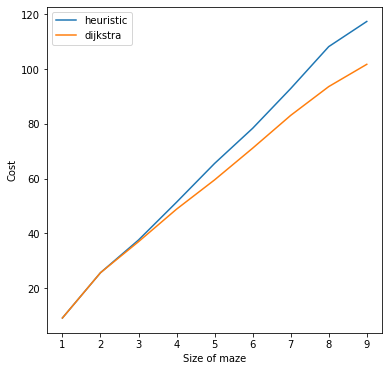

For game mode: 2


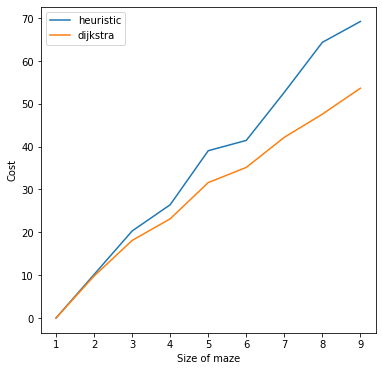

,Size of maze,AvgCost1Heuristic,AvgCost1Dijkstra,AvgCost2Heuristic,AvgCost2Dijkstra,Std1,Std2,Var1,Var2,AvgtimeH1,AvgtimeH2,AvgtimeD1,AvgtimeD2
0,1,9.153846,9.153846,0.000000,0.000000,5.567941,0.000000,31.001972,0.000000,0.025385,0.399744,0.051282,0.028205
1,2,25.666667,25.666667,10.153846,9.794872,10.856484,5.767008,117.863248,30.778435,0.039487,0.000000,0.133846,0.206154
2,3,37.615385,37.000000,20.307692,18.102564,12.936958,8.388496,157.384615,46.963840,0.205385,0.000000,0.328462,0.581795
3,4,51.410256,48.871795,26.435897,23.153846,13.889155,8.926466,174.163051,57.104536,0.000000,0.000000,0.762821,1.184872
4,5,65.564103,59.564103,39.051282,31.615385,13.671597,9.615556,106.194609,69.928994,0.000000,0.052308,1.876410,1.948462
5,6,78.384615,71.128205,41.461538,35.153846,14.490696,10.285280,174.522025,60.130178,0.051282,0.000000,3.384872,4.016410
6,7,92.897436,83.102564,52.692308,42.179487,18.417933,11.096670,270.963840,76.301118,0.000000,0.000000,5.635897,5.746667
7,8,108.205128,93.615385,64.358974,47.589744,18.817858,11.574701,226.800789,65.523997,0.257692,0.051282,8.113333,8.978974
8,9,117.384615,101.743590,69.230769,53.641026,23.877481,12.045771,374.703485,110.589086,0.000000,0.025641,12.601538,13.564872


In [10]:
table =  analysis("size of maze",range(1,10),range(1,40))
table ['Size of maze'] = range(1,10)
cols = table.columns.tolist()
cols = cols[-1:] + cols[:-1]
table = table[cols]
table

## Analysis of cost in Uniform distributon

C:\Users\Sunny\Anaconda3\envs\tensorflow.sessions\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Sunny\Anaconda3\envs\tensorflow.sessions\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


For game mode: 1


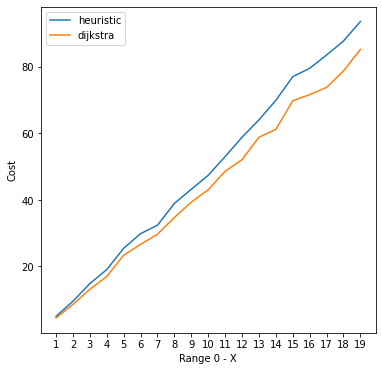

For game mode: 2


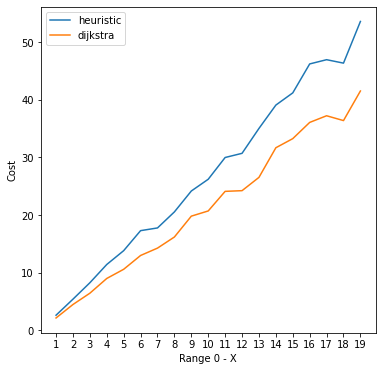

,Range from 0 to,AvgCost1Heuristic,AvgCost1Dijkstra,AvgCost2Heuristic,AvgCost2Dijkstra,Std1,Std2,Var1,Var2
0,1,5.037287,4.524467,2.636472,2.156938,0.999924,0.643323,0.656751,0.212433
1,2,9.552789,8.603937,5.415464,4.491472,1.660102,1.290565,1.411101,0.711538
2,3,14.866126,13.152008,8.261080,6.450960,2.196583,1.810092,4.470378,1.055218
3,4,19.076729,16.987251,11.430348,9.008169,3.765366,2.561347,10.022422,2.658423
4,5,25.484047,23.408625,13.827349,10.599257,4.333216,3.183911,13.854647,5.460871
5,6,29.870916,26.643693,17.296879,12.991687,5.744496,4.929801,24.513235,7.375471
6,7,32.412556,29.715425,17.765270,14.268698,7.136795,4.343734,36.901905,8.351428
7,8,38.965224,34.735627,20.547410,16.195193,9.250233,5.192126,65.007958,10.886527
8,9,43.221735,39.348018,24.168242,19.809468,9.678608,5.013961,66.042190,12.738212
9,10,47.412972,43.063215,26.205535,20.711228,9.229302,5.877863,63.377007,14.938707


In [11]:
table = analysis("uniform",range(1,20),range(1,40))
table ['Range from 0 to'] = range(1,20)
cols = table.columns.tolist()
cols = cols[-1:] + cols[:-1]
table = table[cols]
table

## Analysis of cost in Poisson distributon

For game mode: 1


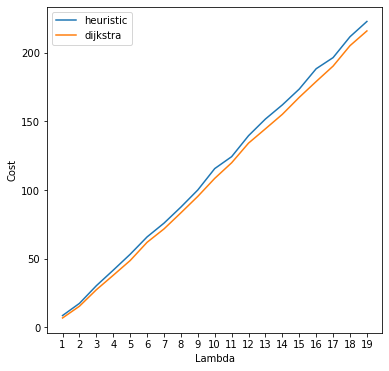

For game mode: 2


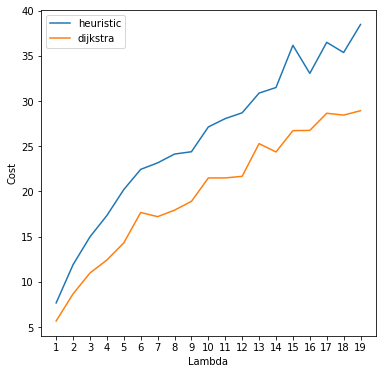

,Lambda,AvgCost1Heuristic,AvgCost1Dijkstra,AvgCost2Heuristic,AvgCost2Dijkstra,Std1,Std2,Var1,Var2
0,1,8.564103,6.794872,7.666667,5.666667,2.862623,3.346129,6.009204,4.222222
1,2,17.435897,15.358974,11.897436,8.666667,3.557548,3.787935,7.563445,5.401709
2,3,30.307692,27.358974,14.974359,10.974359,4.374482,5.030610,22.794214,9.307035
3,4,41.641026,37.923077,17.333333,12.410256,6.232616,4.789590,26.583826,10.498356
4,5,53.205128,48.641026,20.205128,14.307692,7.415090,6.239574,36.076266,13.443787
5,6,65.846154,61.923077,22.435897,17.666667,7.624315,6.578110,44.378698,29.914530
6,7,75.871795,71.666667,23.153846,17.205128,7.100666,8.090952,34.170940,20.009204
7,8,87.589744,83.410256,24.128205,17.923077,9.415530,8.190612,57.831690,24.429980
8,9,100.051282,95.384615,24.384615,18.897436,10.139915,7.985934,74.082840,27.938199
9,10,115.615385,108.487179,27.128205,21.487179,11.709333,7.042652,66.967784,26.916502


In [11]:
table = analysis("poisson",range(1,20),range(1,40))
table['Lambda'] = range(1,20)
cols = table.columns.tolist()
cols = cols[-1:] + cols[:-1]
table = table[cols]
table['Lambda'] = range(1,20)
table

## Analysis of cost in Negative binomial distributon

For trial:  1


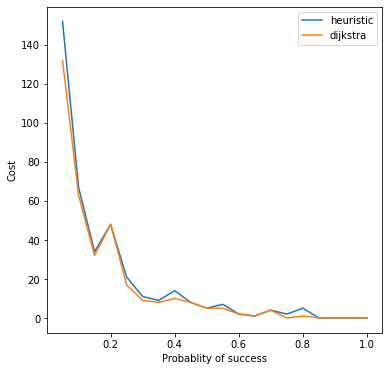

For trial:  2


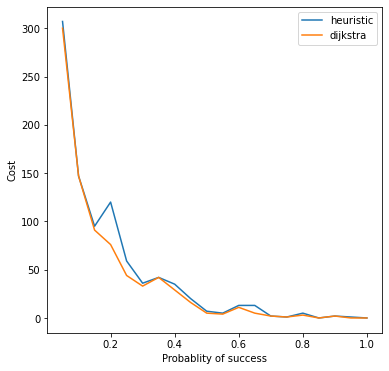

For trial:  3


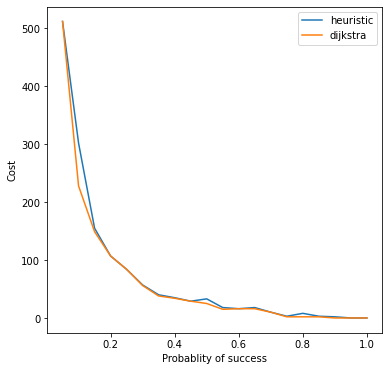

For trial:  4


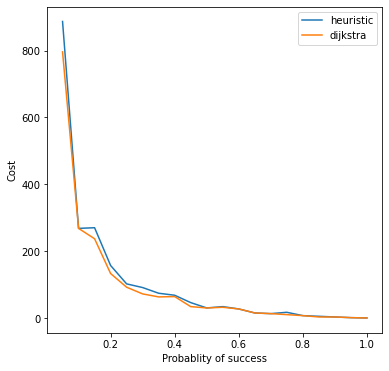

For trial:  5


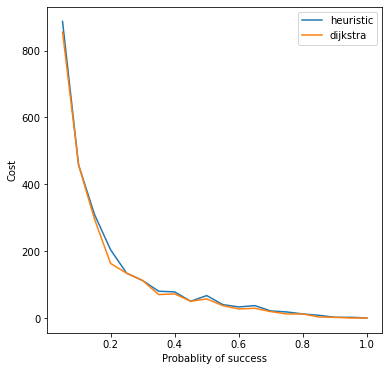

For trial:  6


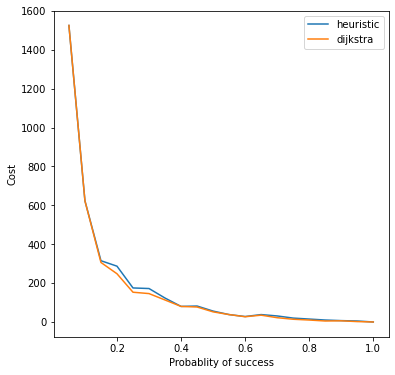

For trial:  7


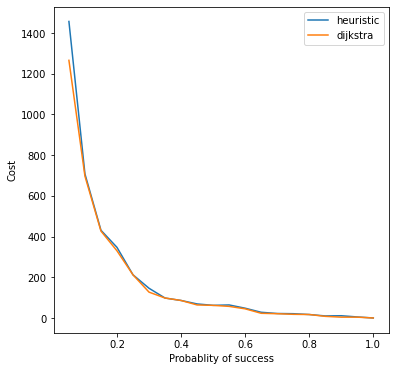

For trial:  8


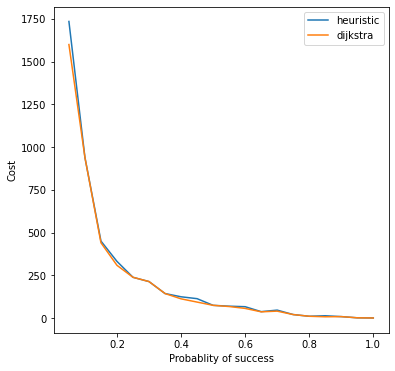

For trial:  9


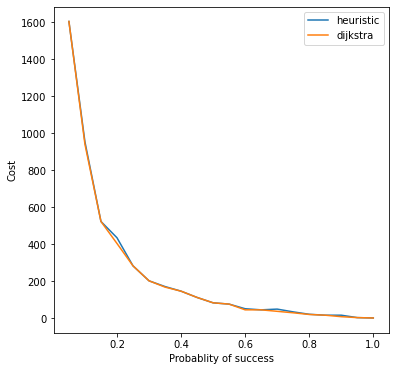

For trial:  10


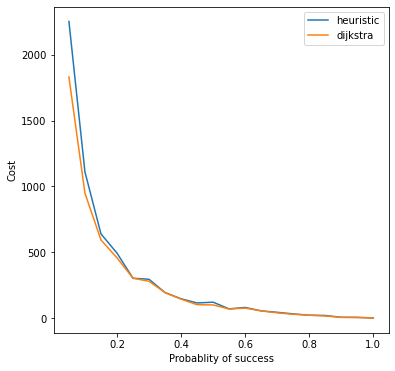

For trial:  11


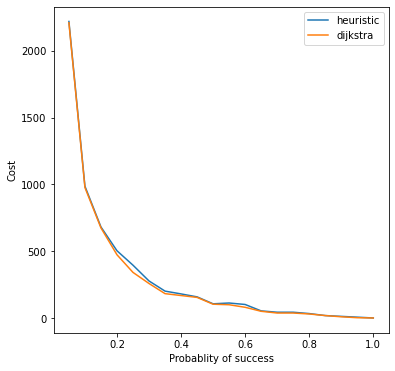

For trial:  12


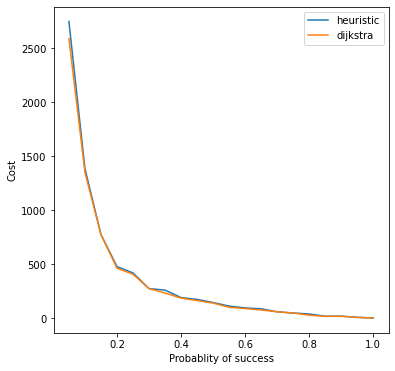

For trial:  13


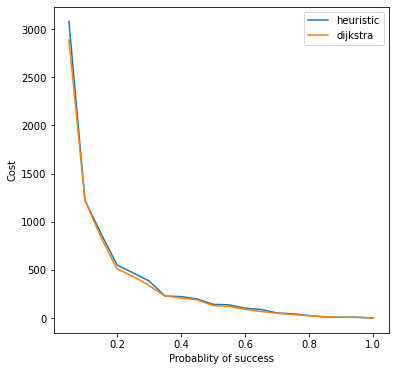

For trial:  14


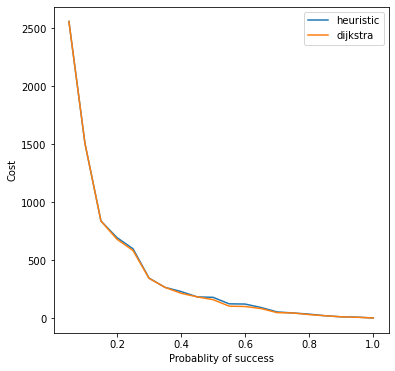

For trial:  15


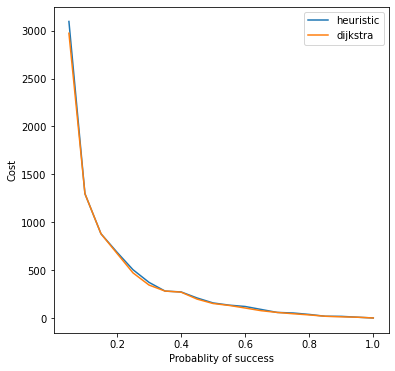

For trial:  16


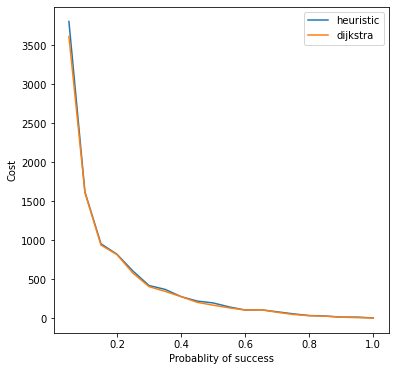

For trial:  17


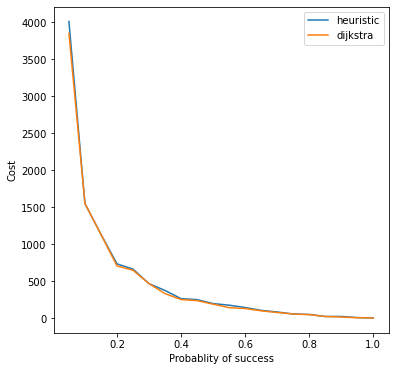

For trial:  18


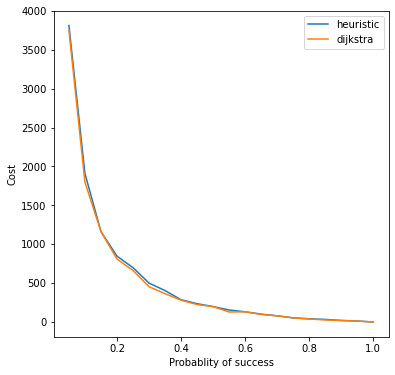

For trial:  19


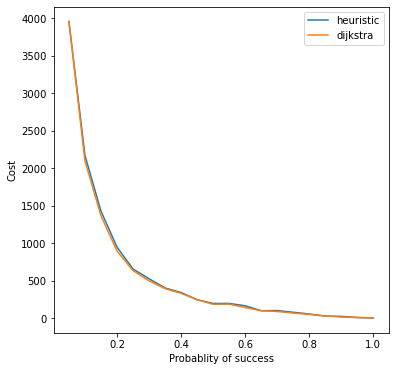

For trial:  1


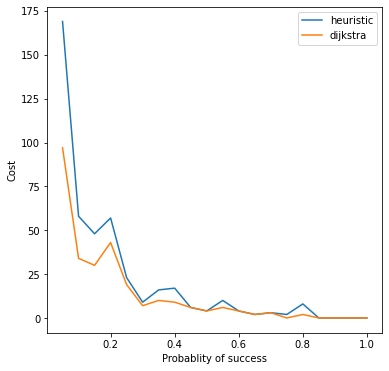

For trial:  2


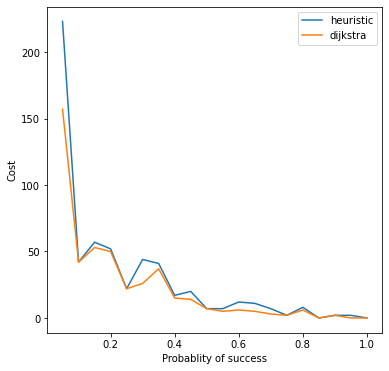

For trial:  3


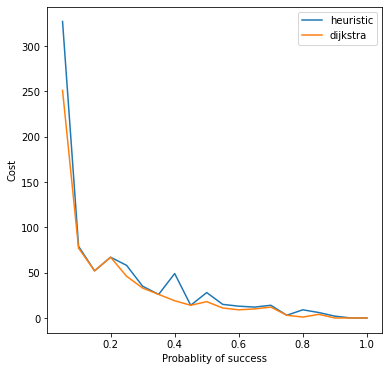

For trial:  4


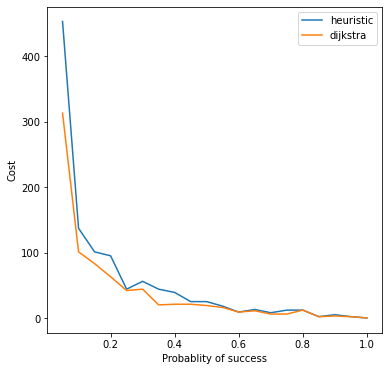

For trial:  5


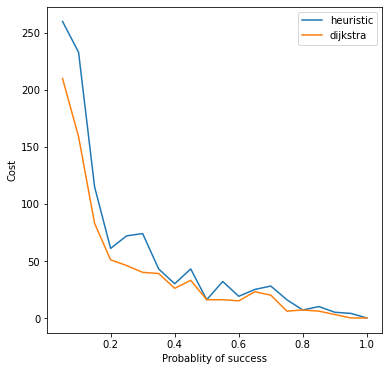

For trial:  6


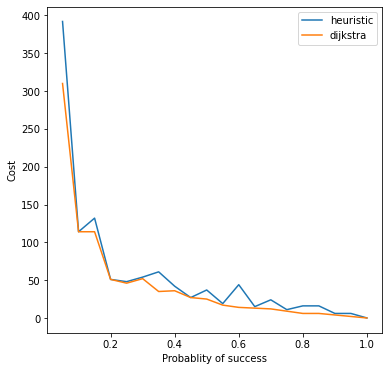

For trial:  7


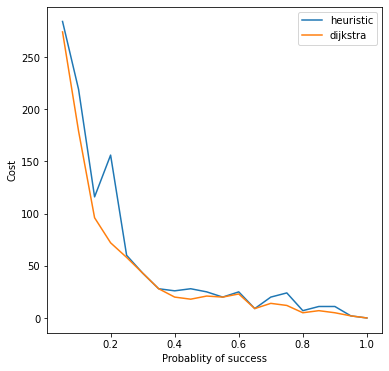

For trial:  8


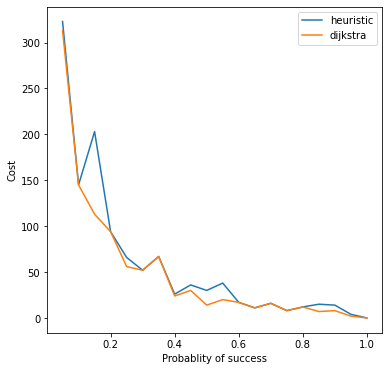

For trial:  9


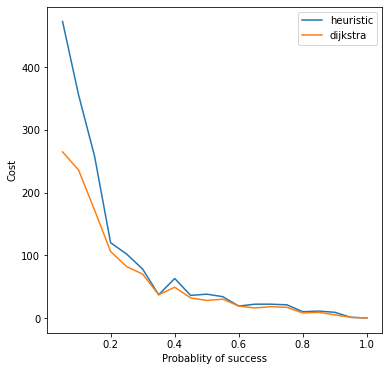

For trial:  10


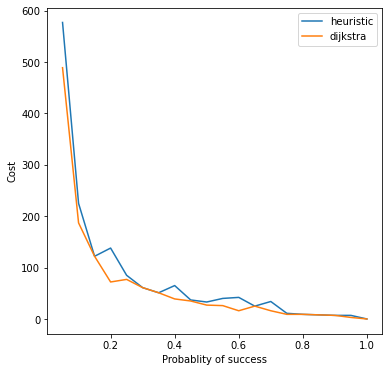

For trial:  11


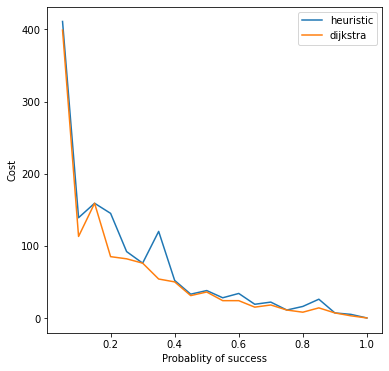

For trial:  12


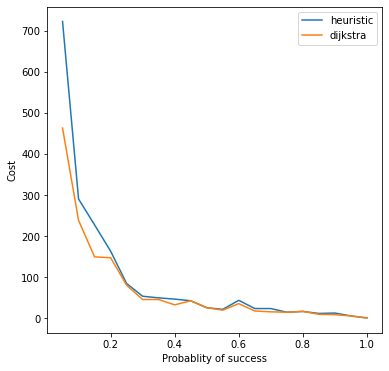

For trial:  13


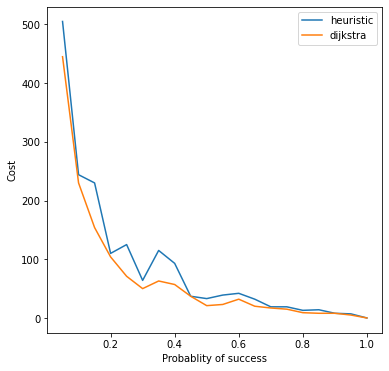

For trial:  14


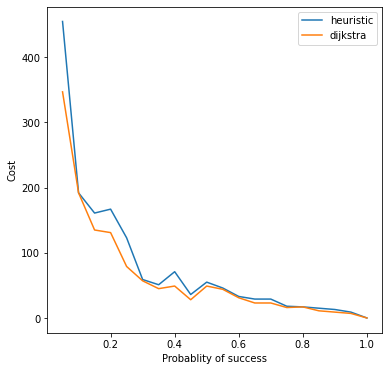

For trial:  15


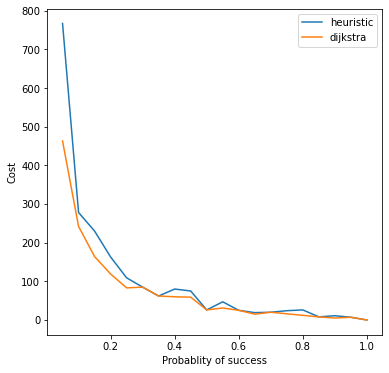

For trial:  16


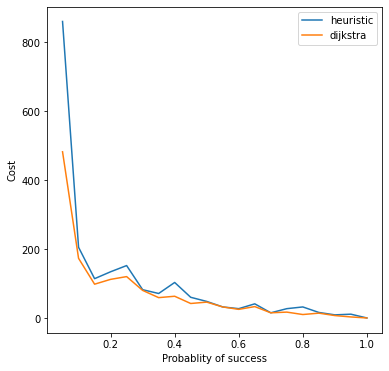

For trial:  17


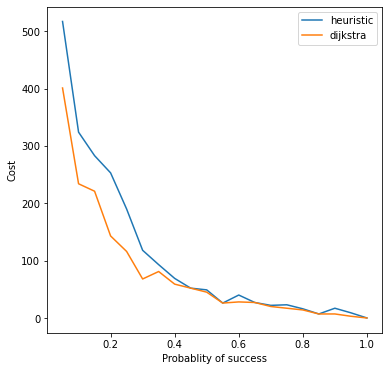

For trial:  18


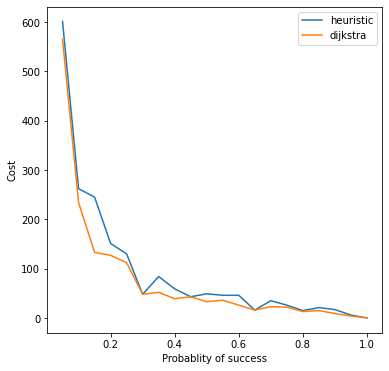

For trial:  19


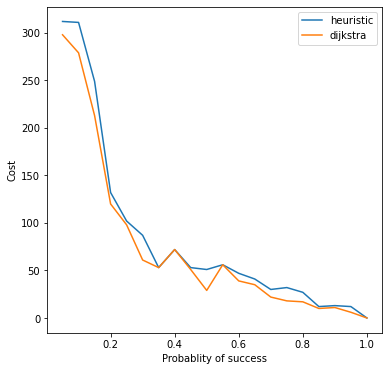

,Trials,Probablity between 0.05 to,AvgCost1Heuristic,AvgCost1Dijkstra,AvgCost2Heuristic,AvgCost2Dijkstra,Std1,Std2,Var1,Var2
0,1,1.0,19.50,17.25,21.80,13.80,34.982138,38.325709,971.9875,510.8600
1,2,1.0,45.50,40.55,28.80,22.60,72.969514,48.028741,4943.5475,1232.2400
2,3,1.0,71.60,66.25,40.45,32.65,122.971704,69.695391,13755.1875,3001.8275
3,4,1.0,105.75,95.00,55.00,39.70,195.823103,98.346835,31244.1000,4677.0100
4,5,1.0,127.60,120.35,54.65,39.95,207.726599,69.948749,40731.7275,2787.4475
5,6,1.0,181.50,174.10,55.75,44.65,341.579639,84.002902,116972.3900,4724.3275
6,7,1.0,192.10,178.30,55.70,45.30,338.581142,75.846622,91847.1100,4454.5100
7,8,1.0,231.50,220.25,58.85,50.45,406.299212,78.520236,146012.4875,5154.3475
8,9,1.0,240.30,236.35,85.50,60.00,386.664338,125.103757,148709.1275,5712.2000
9,10,1.0,299.55,262.70,78.85,63.95,521.834023,126.268474,184722.6100,11509.4475


In [12]:
table = analysis("negative binomial",np.arange(1,20),np.arange(0.05,1.05,0.05))
table["Trials"] = np.arange(1,20)
table["Probablity between 0.05 to"] = np.ones(19)
cols = table.columns.tolist()
cols = cols[-2:] + cols[:-2]
table = table[cols]
table

## Analysis of cost in gamma distribution

For shape:  1


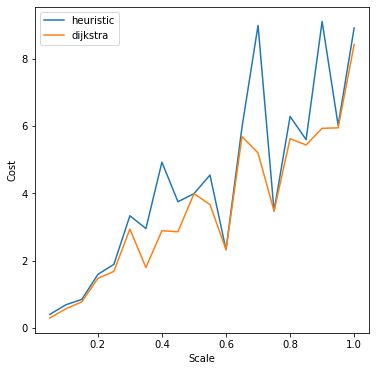

For shape:  2


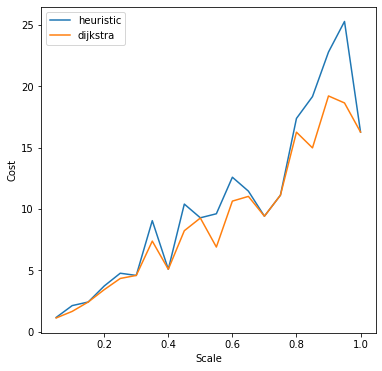

For shape:  3


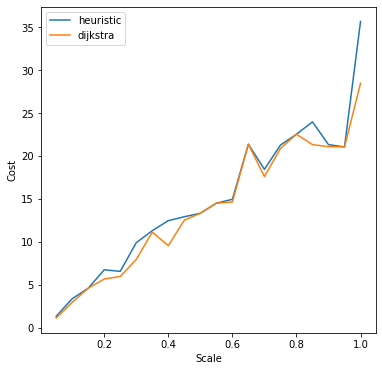

For shape:  4


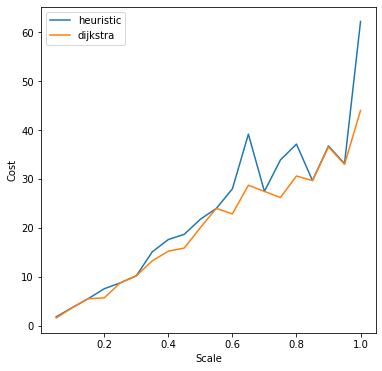

For shape:  5


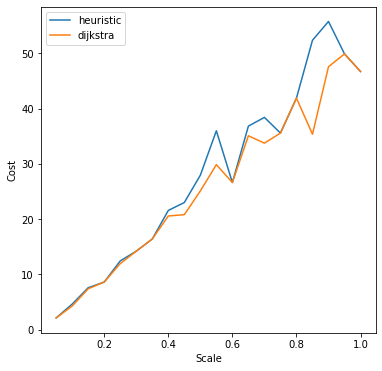

For shape:  6


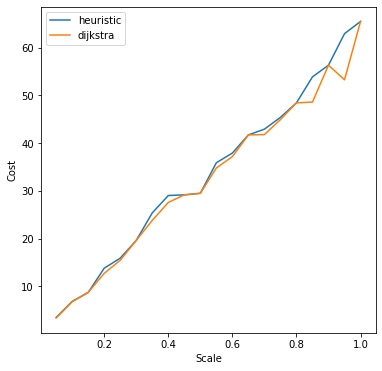

For shape:  7


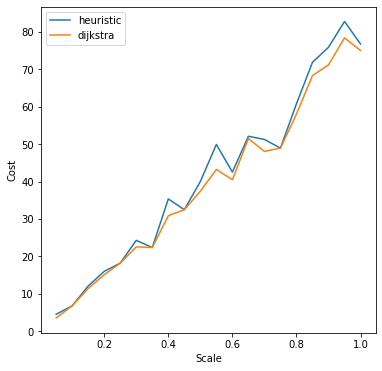

For shape:  8


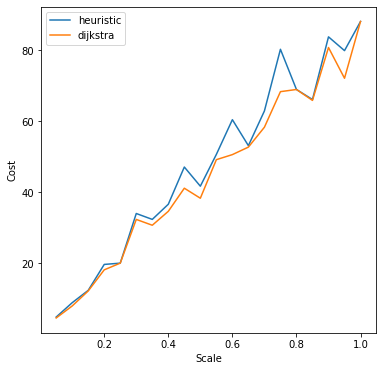

For shape:  9


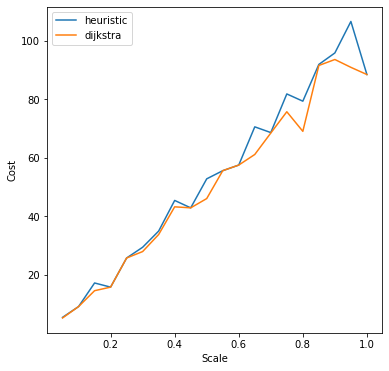

For shape:  10


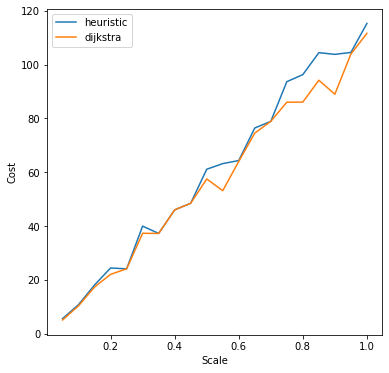

For shape:  11


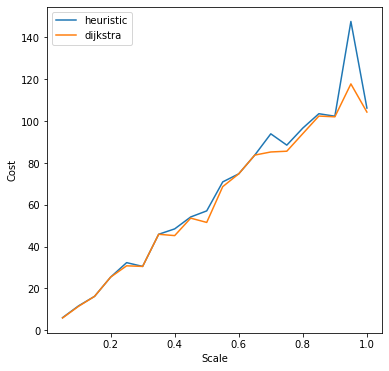

For shape:  12


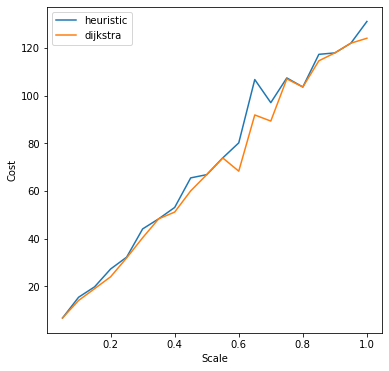

For shape:  13


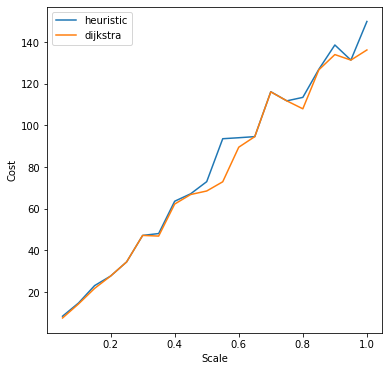

For shape:  14


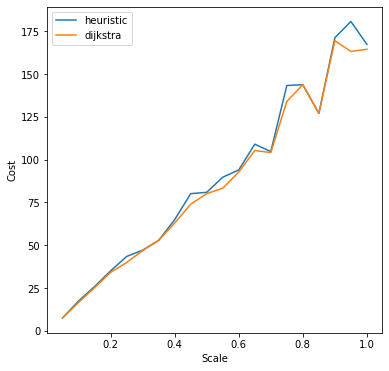

For shape:  15


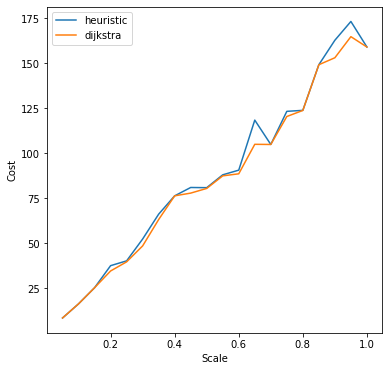

For shape:  16


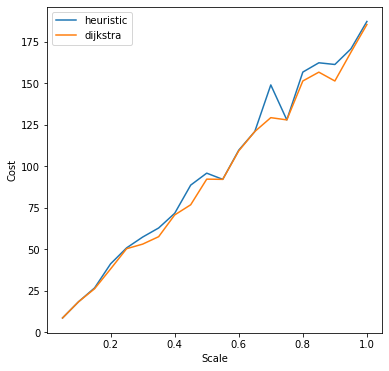

For shape:  17


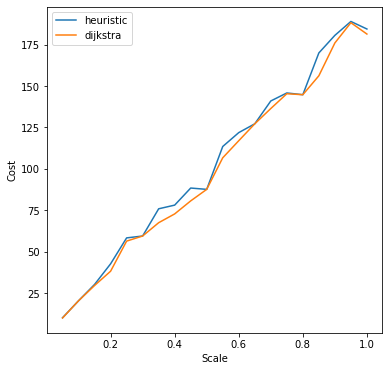

For shape:  18


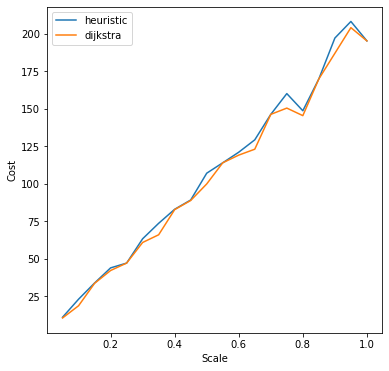

For shape:  19


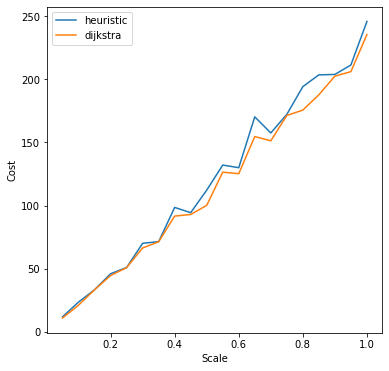

For shape:  1


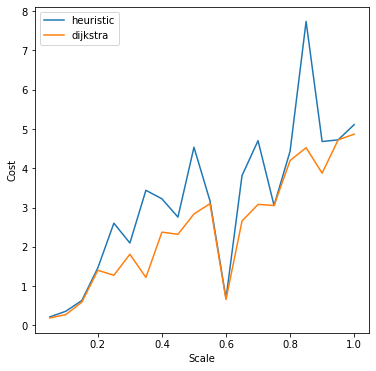

For shape:  2


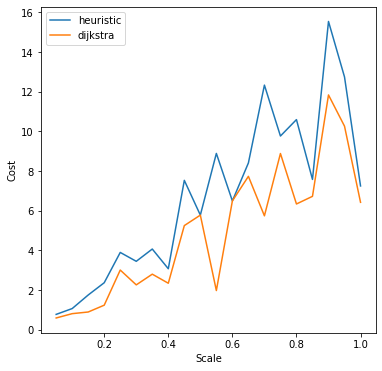

For shape:  3


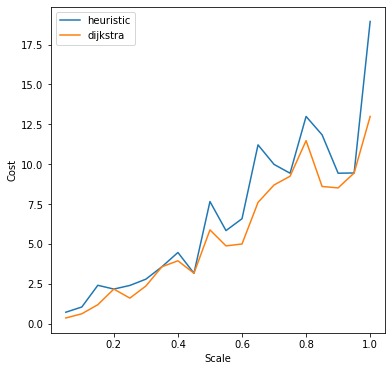

For shape:  4


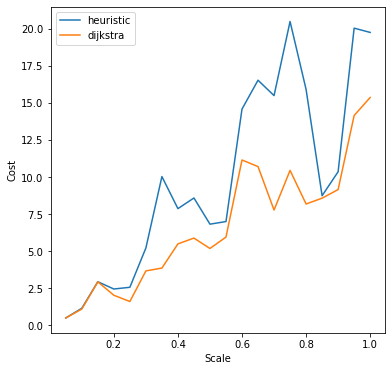

For shape:  5


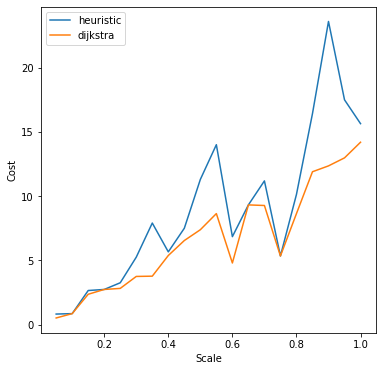

For shape:  6


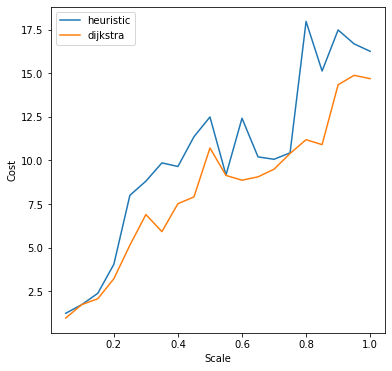

For shape:  7


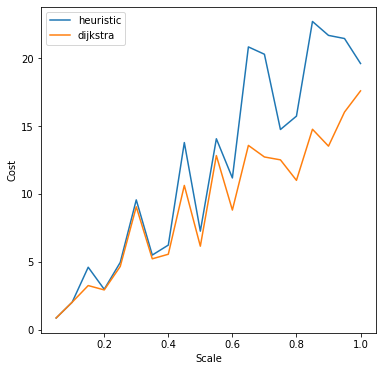

For shape:  8


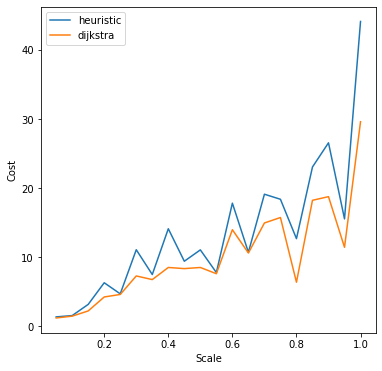

For shape:  9


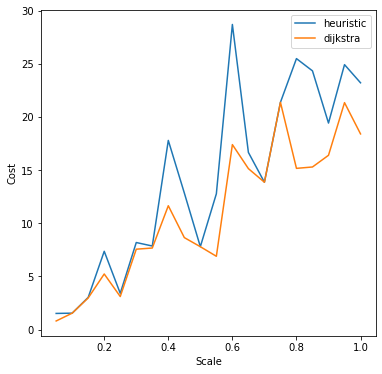

For shape:  10


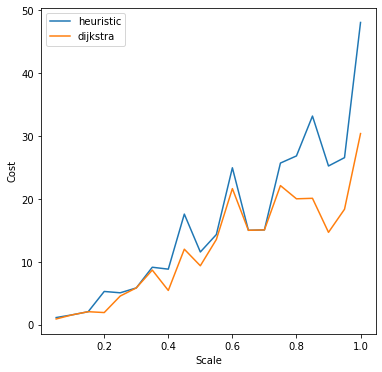

For shape:  11


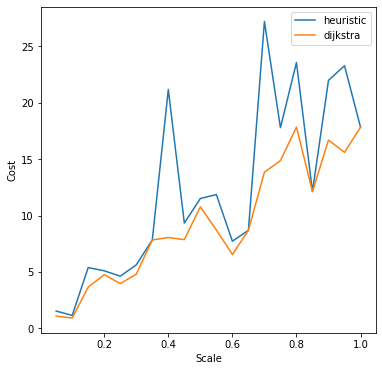

For shape:  12


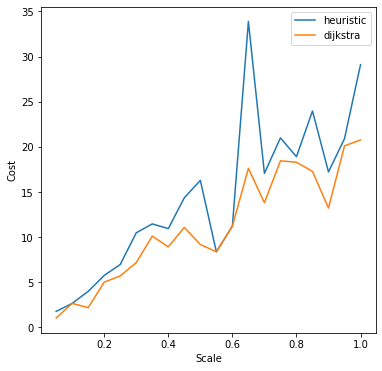

For shape:  13


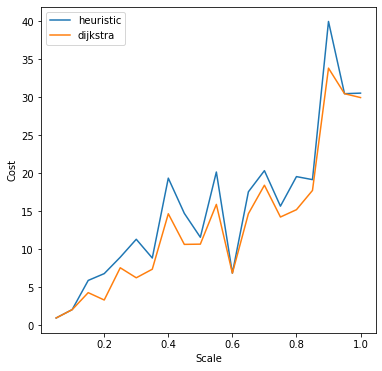

For shape:  14


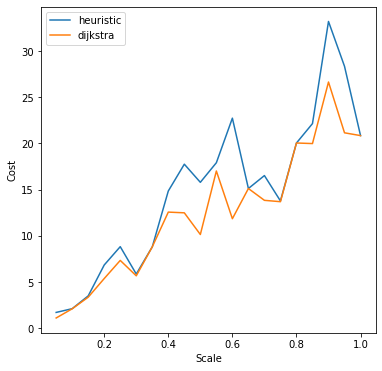

For shape:  15


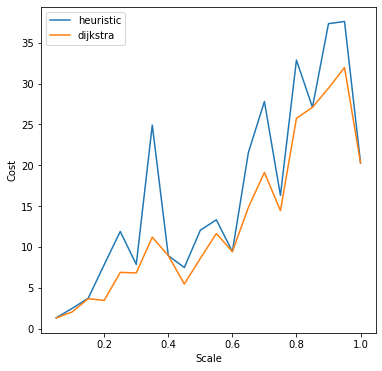

For shape:  16


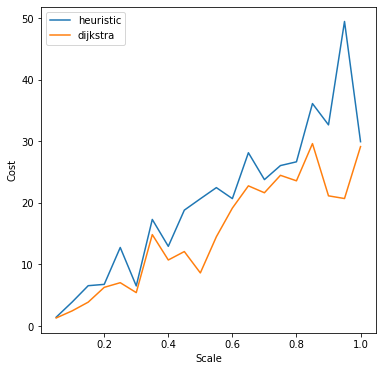

For shape:  17


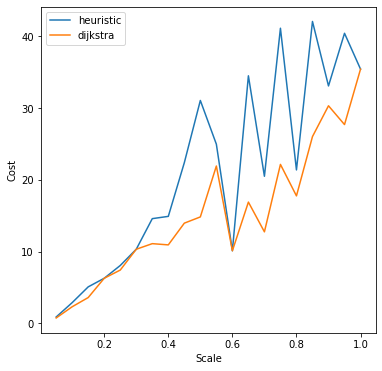

For shape:  18


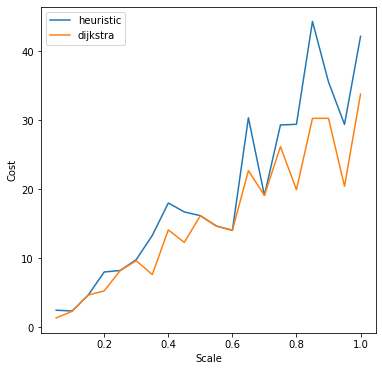

For shape:  19


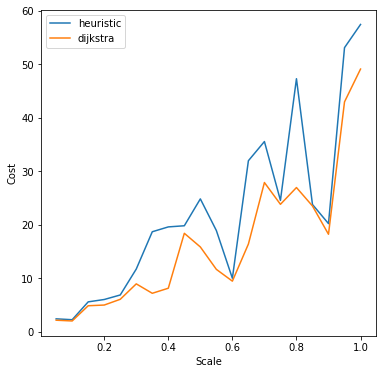

,Shape,Scale 0.05 to,AvgCost1Heuristic,AvgCost1Dijkstra,AvgCost2Heuristic,AvgCost2Dijkstra,Std1,Std2,Var1,Var2
0,1,1.0,4.276203,3.545827,3.170975,2.450302,2.637090,1.863517,4.561319,2.135350
1,2,1.0,10.377618,9.093087,6.671421,4.874154,6.712338,4.059700,30.202978,10.360800
2,3,1.0,14.871899,13.903449,6.801683,5.562536,8.229744,4.684736,56.341721,13.602096
3,4,1.0,23.091465,20.133702,9.849708,6.685273,14.725391,6.382079,137.177696,17.357946
4,5,1.0,27.936664,25.693290,8.898910,6.682339,16.350964,5.965783,211.870787,16.100714
5,6,1.0,33.611308,32.454917,10.272034,8.255515,18.180517,4.935898,299.918216,16.448522
6,7,1.0,41.234425,39.179438,11.995710,9.178001,23.643856,7.229896,509.440983,24.135544
7,8,1.0,47.542322,44.700461,13.285213,10.006400,25.481952,9.775893,583.769171,46.137087
8,9,1.0,53.676292,50.741051,14.117744,10.923371,30.173304,8.563307,794.684644,40.546096
9,10,1.0,60.827729,57.339051,16.165216,12.178188,33.871781,12.041565,991.375126,65.942424


In [13]:
table = analysis("gamma",np.arange(1,20),np.arange(0.05,1.05,0.05))
table["Shape"] = np.arange(1,20)
table["Scale 0.05 to"] = np.ones(19)
cols = table.columns.tolist()
cols = cols[-2:] + cols[:-2]
table = table[cols]
table

## Analysis of cost in log normal distribution

For mean:  0.25


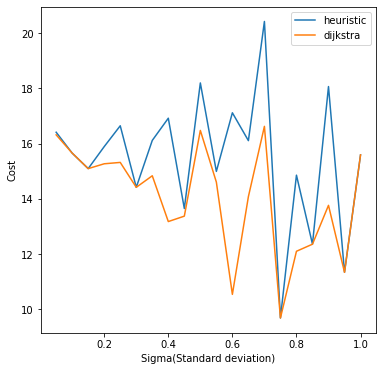

For mean:  0.5


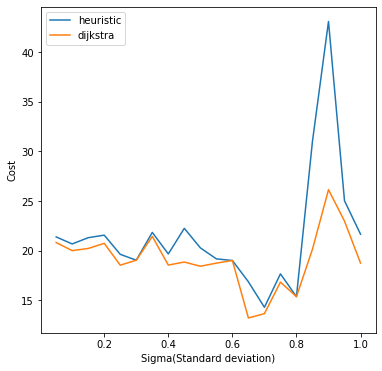

For mean:  0.75


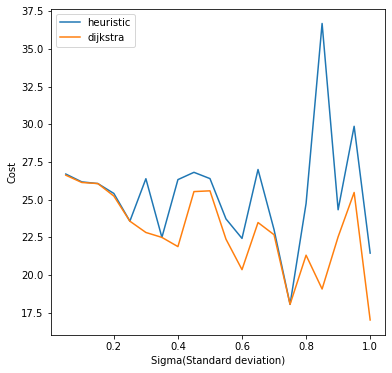

For mean:  1.0


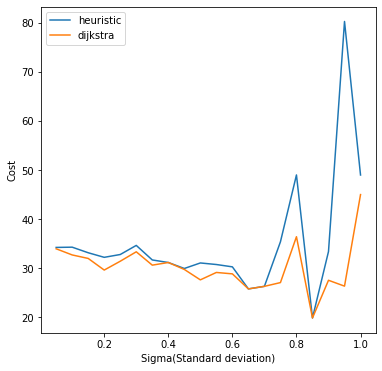

For mean:  1.25


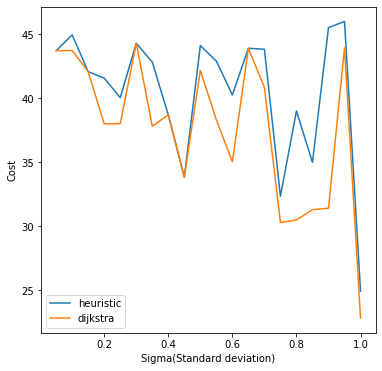

For mean:  1.5


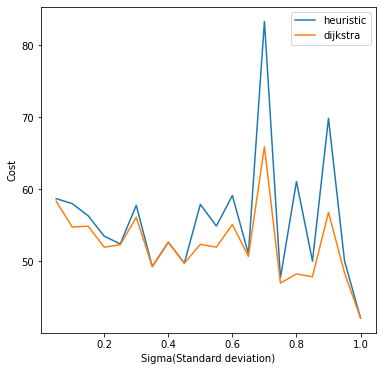

For mean:  1.75


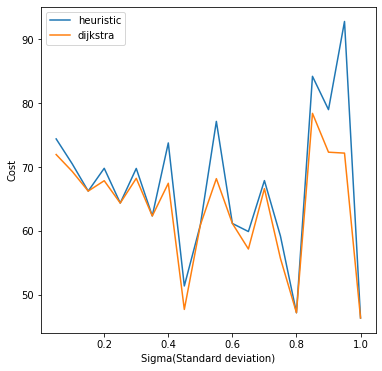

For mean:  2.0


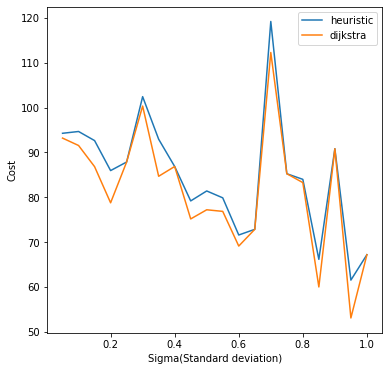

For mean:  2.25


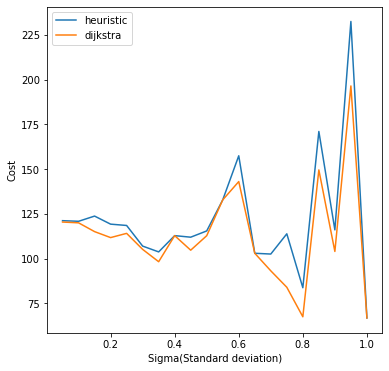

For mean:  2.5


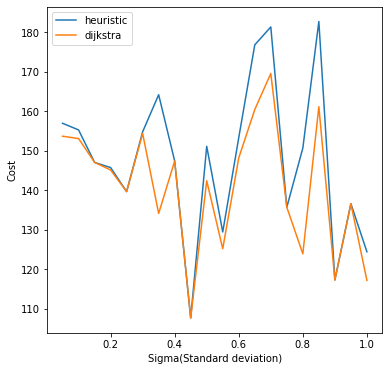

For mean:  2.75


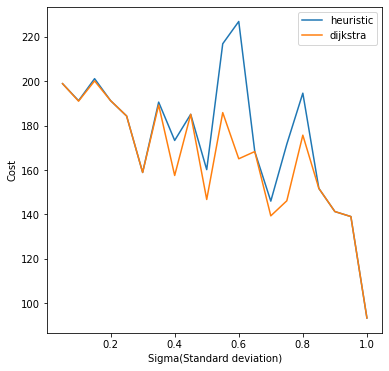

For mean:  3.0


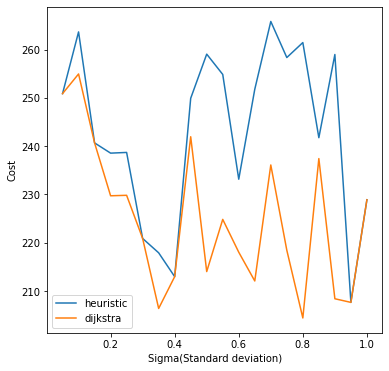

For mean:  3.25


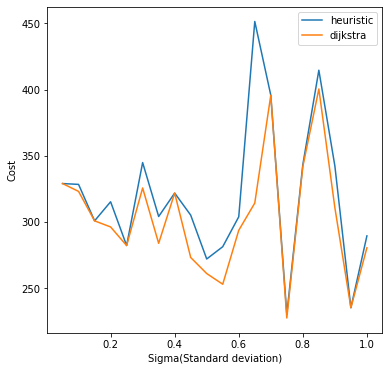

For mean:  3.5


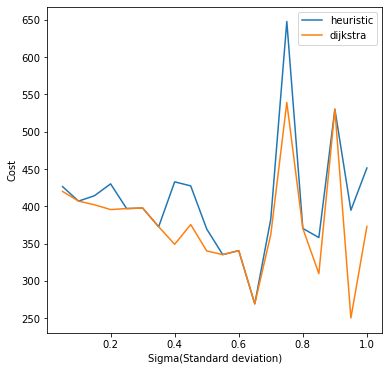

For mean:  3.75


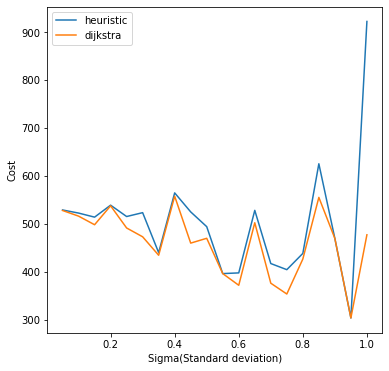

For mean:  4.0


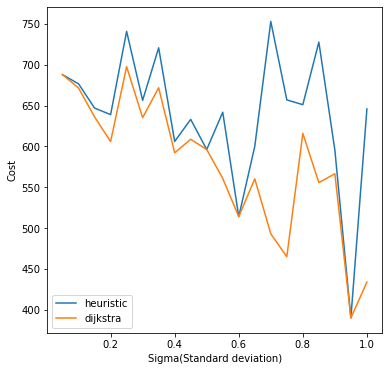

For mean:  4.25


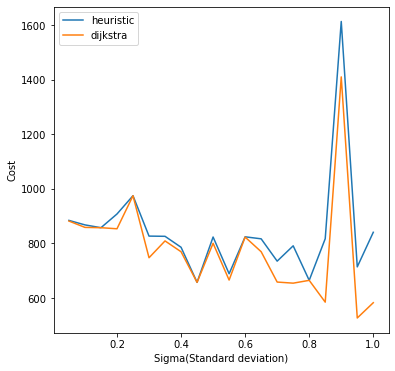

For mean:  4.5


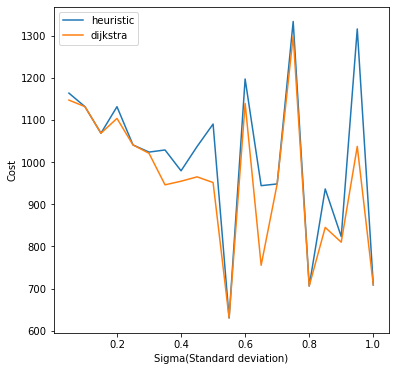

For mean:  4.75


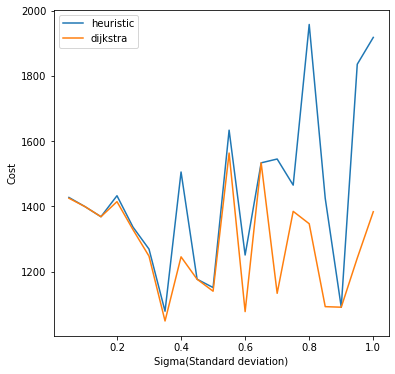

For mean:  5.0


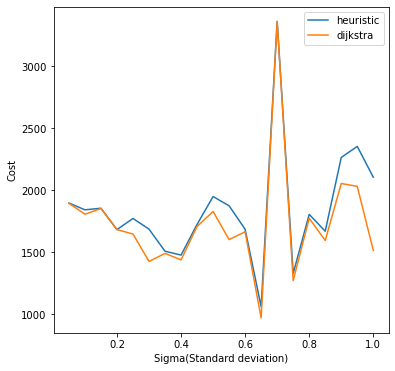

For mean:  0.25


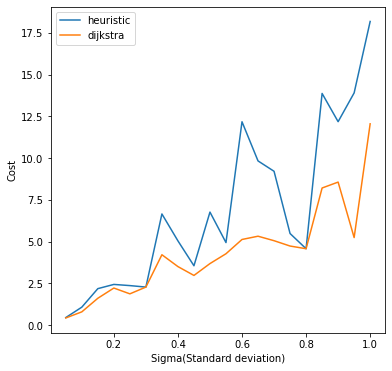

For mean:  0.5


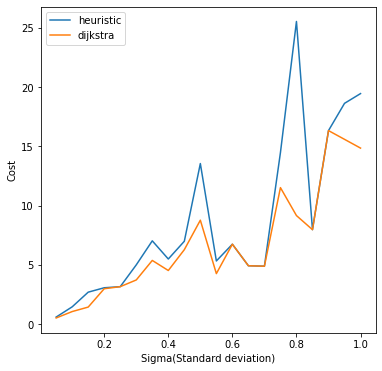

For mean:  0.75


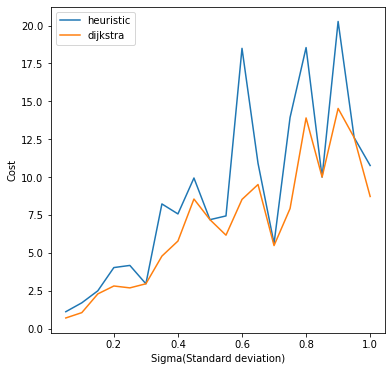

For mean:  1.0


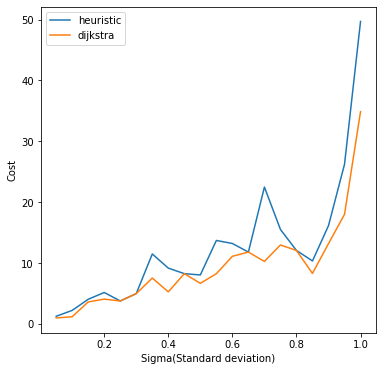

For mean:  1.25


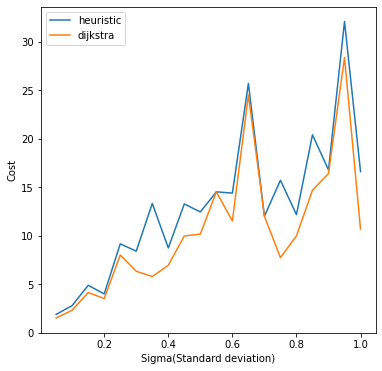

For mean:  1.5


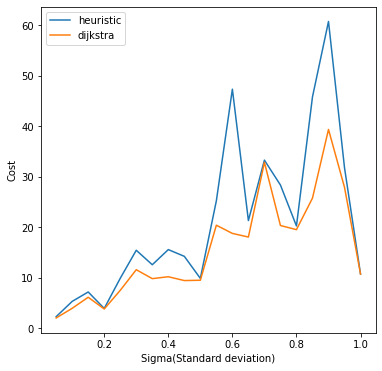

For mean:  1.75


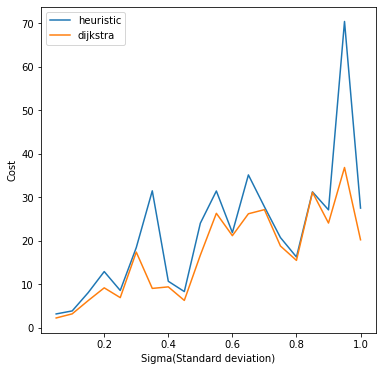

For mean:  2.0


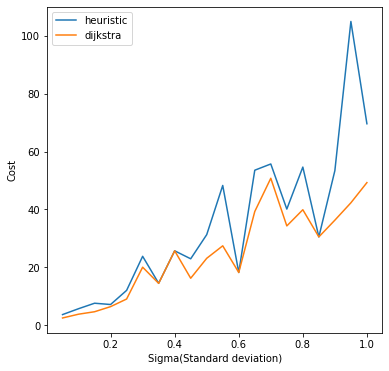

For mean:  2.25


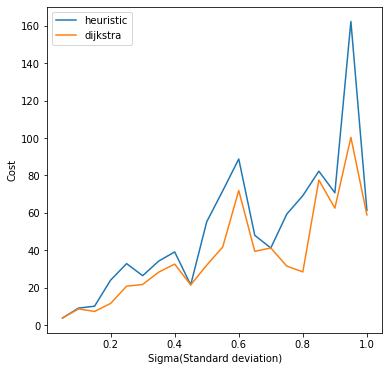

For mean:  2.5


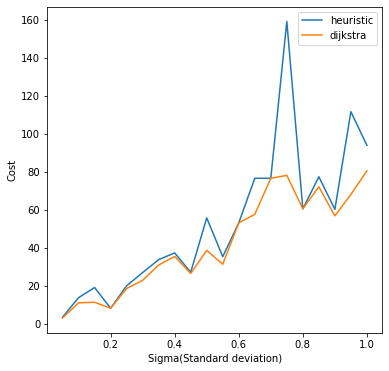

For mean:  2.75


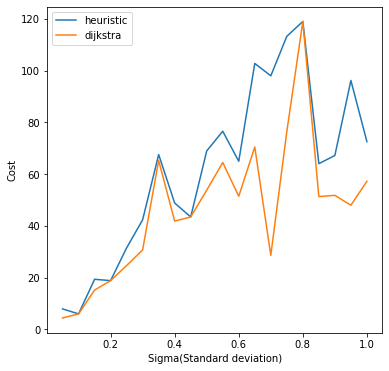

For mean:  3.0


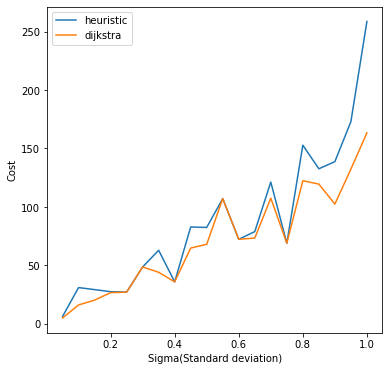

For mean:  3.25


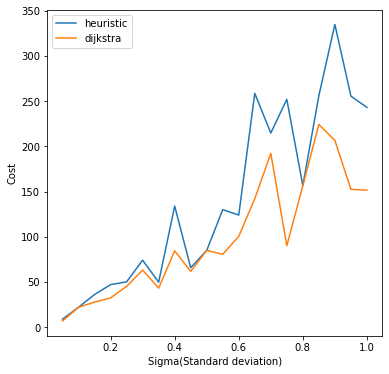

For mean:  3.5


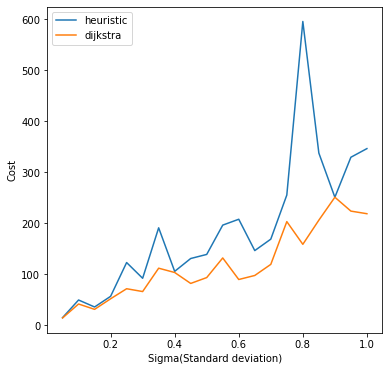

For mean:  3.75


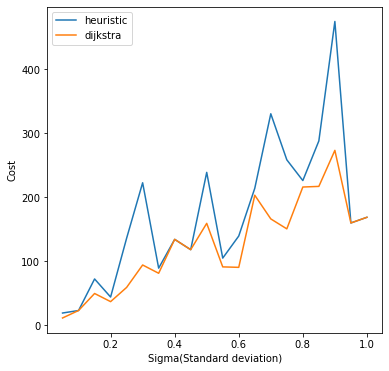

For mean:  4.0


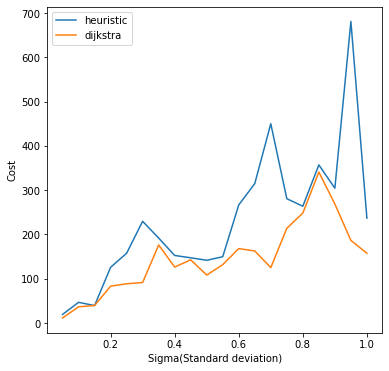

For mean:  4.25


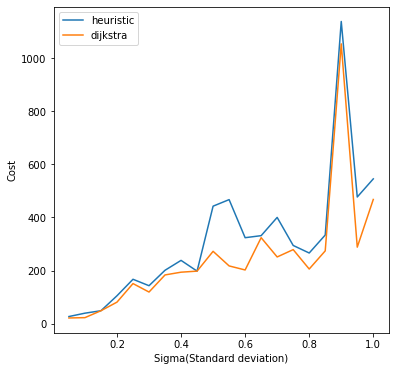

For mean:  4.5


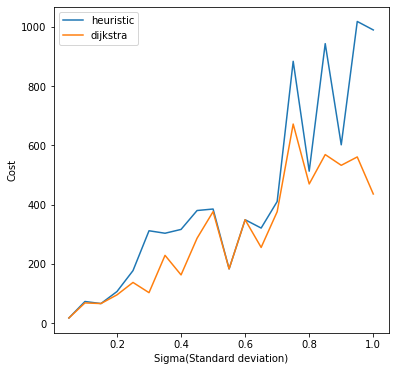

For mean:  4.75


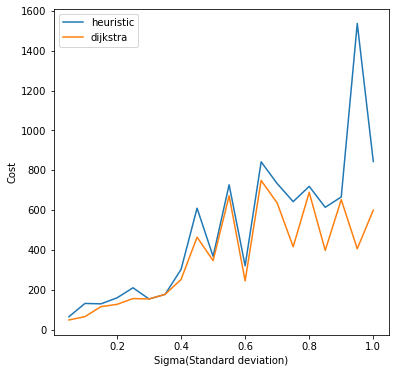

For mean:  5.0


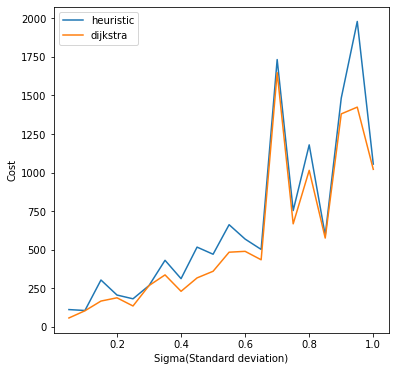

,Mean,Sigma is between 0.05 to,AvgCost1Heuristic,AvgCost1Dijkstra,AvgCost2Heuristic,AvgCost2Dijkstra,Std1,Std2,Var1,Var2
0,0.25,1.0,15.475925,14.029725,6.854293,4.331276,2.369733,4.901812,3.729875,7.437598
1,0.50,1.0,21.550632,19.085018,8.657366,6.695158,6.005499,6.721914,8.166299,21.271386
2,0.75,1.0,25.382850,22.916919,8.897035,6.805979,3.588751,5.553617,7.235769,15.920045
3,1.00,1.0,35.250537,30.218277,12.472406,9.349734,12.153988,10.586467,23.837718,52.536645
4,1.25,1.0,40.478276,37.522694,12.965642,10.455527,5.195673,7.251819,33.696934,44.633550
5,1.50,1.0,55.756931,52.304223,21.060312,15.381219,8.548954,15.568947,23.932314,99.464762
6,1.75,1.0,66.918430,63.585797,21.961016,16.707418,11.423859,14.794387,75.034409,93.626021
7,2.00,1.0,84.830169,81.653552,34.141315,24.680714,13.130100,25.271862,177.189780,223.096174
8,2.25,1.0,121.740016,112.803654,50.595686,37.138488,33.238694,35.224788,781.894866,621.685326
9,2.50,1.0,147.910688,140.992493,52.522268,42.100799,19.310123,37.866581,255.468593,624.481027


In [14]:
table = analysis("log normal",np.arange(0.25,5.25,0.25),np.arange(0.05,1.05,0.05))
table["Mean"] = np.arange(0.25,5.25,0.25)
table["Sigma is between 0.05 to"] = np.ones(np.arange(0.05,1.05,0.05).shape[0])
cols = table.columns.tolist()
cols = cols[-2:] + cols[:-2]
table = table[cols]
table